In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.base import BaseEstimator
import time
from sklearn.model_selection import GridSearchCV

In [7]:
class Marketing_Response:
    def __init__(self, df, target):
        self.df = df
        self.target = target
        # Define Target
        self.y = df[target].values
        # Standardize
        df = self.standardize_data()
        # Define Features 
        self.X = df.values
        self.models = {}
        self.results = {}
            
    def split_data(self, test_size=0.25):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=42)
        
    def standardize_data(self):
        # Standardization (Z-score scaling)
        scaler_standard = StandardScaler()
        standardized_data = scaler_standard.fit_transform(self.df.drop(columns=["ID", "Year_Birth", "Dt_Customer", "Response"], axis=1))
        return pd.DataFrame(standardized_data, columns=df.drop(columns=["ID", "Year_Birth", "Dt_Customer", "Response"], axis=1).columns)

    class BaseModel:
        def __init__(self, model:BaseEstimator):
            self.model = model
            
        def fit(self, X, y):
            start_time = time.time()
            self.model.fit(X, y)
            print(f"Training Time = {time.time() - start_time:.2F} Seconds")
            
        def predict(self, X):
            return self.model.predict(X)
        
    def evaluate_model(self, model_name, y_pred):
        cm = confusion_matrix(self.y_test, y_pred)
        cr = classification_report(self.y_test, y_pred)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
        plt.title(f'Confusion Matrix Heatmap for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print(f"{model_name} Classification Report")
        print(cr)
        print("="*50)
    
    def optimize_model(self, model_name, model, params):
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
        grid_search.fit(self.X_train, self.y_train)
        self.models[model_name] = self.BaseModel(grid_search.best_estimator_)
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    def run_experiments(self):
        # Define hyperparameter grids
        param_grids = {
            "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
            "Logistic Regression": {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'max_iter':[100, 200, 300, 400, 500]},
            "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'criterion': ['gini', 'entropy'],'min_samples_split':[1,2,3,4], 'min_samples_leaf':[1,2,3,4]},
            "Decision Tree": {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20],'min_samples_split':[1,2,3,4], 'min_samples_leaf':[1,2,3,4] },
            "KNN": {'n_neighbors': [3, 5, 7]}
        }
        
        # Optimization
        for model_name, param_grid in param_grids.items():
            model = {
                "SVM": SVC(),
                "Logistic Regression": LogisticRegression(),
                "Random Forest": RandomForestClassifier(),
                "Decision Tree": DecisionTreeClassifier(),
                "KNN": KNeighborsClassifier()
            }[model_name]
            self.optimize_model(model_name, model, param_grid)
        
        for model_name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            self.results[model_name] = y_pred
            self.evaluate_model(model_name, y_pred)

Best parameters for SVM: {'C': 1, 'kernel': 'linear'}
Best parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best parameters for KNN: {'n_neighbors': 7}
Training Time = 0.15 Seconds


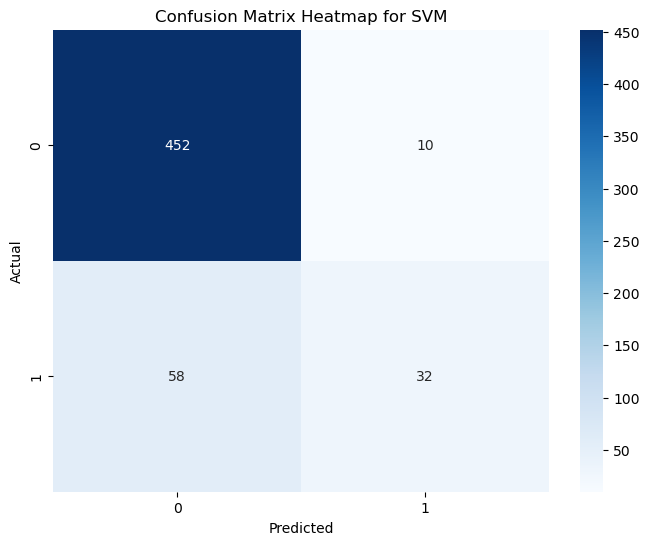

SVM Classification Report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       462
           1       0.76      0.36      0.48        90

    accuracy                           0.88       552
   macro avg       0.82      0.67      0.71       552
weighted avg       0.87      0.88      0.86       552

Training Time = 0.01 Seconds


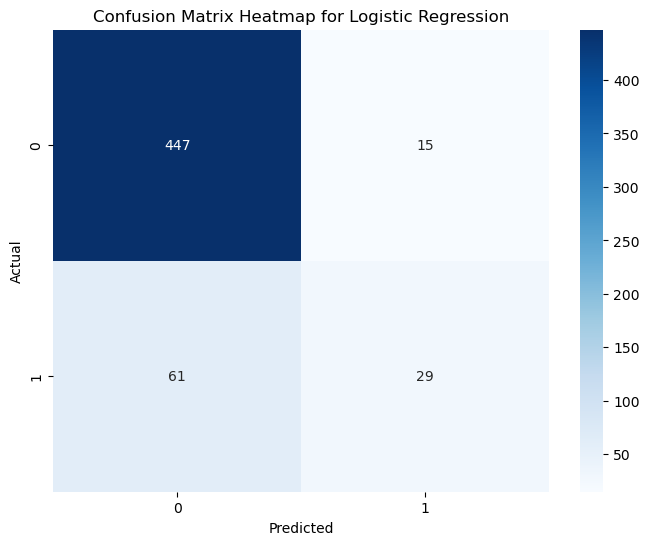

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       462
           1       0.66      0.32      0.43        90

    accuracy                           0.86       552
   macro avg       0.77      0.64      0.68       552
weighted avg       0.84      0.86      0.84       552

Training Time = 0.22 Seconds


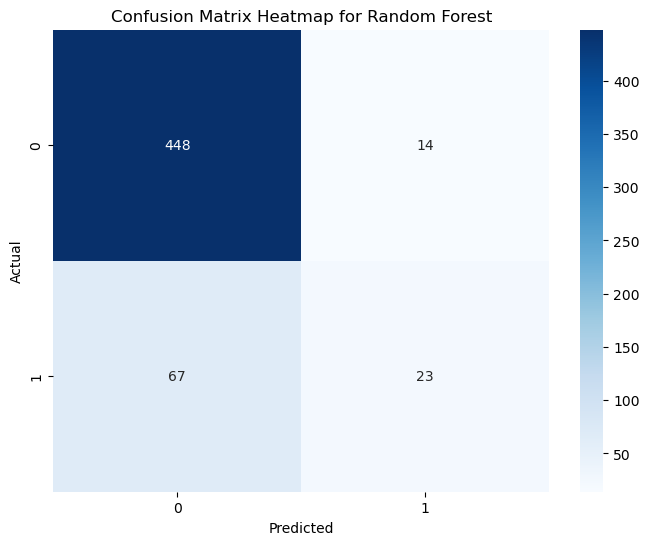

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       462
           1       0.62      0.26      0.36        90

    accuracy                           0.85       552
   macro avg       0.75      0.61      0.64       552
weighted avg       0.83      0.85      0.83       552

Training Time = 0.02 Seconds


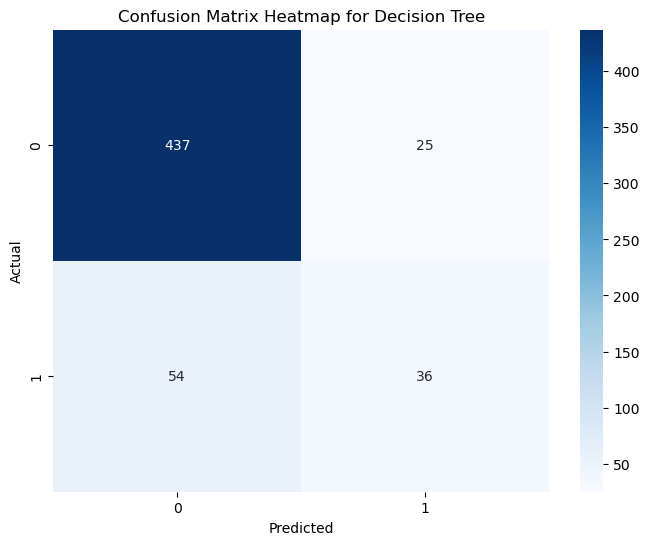

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       462
           1       0.59      0.40      0.48        90

    accuracy                           0.86       552
   macro avg       0.74      0.67      0.70       552
weighted avg       0.84      0.86      0.85       552

Training Time = 0.00 Seconds


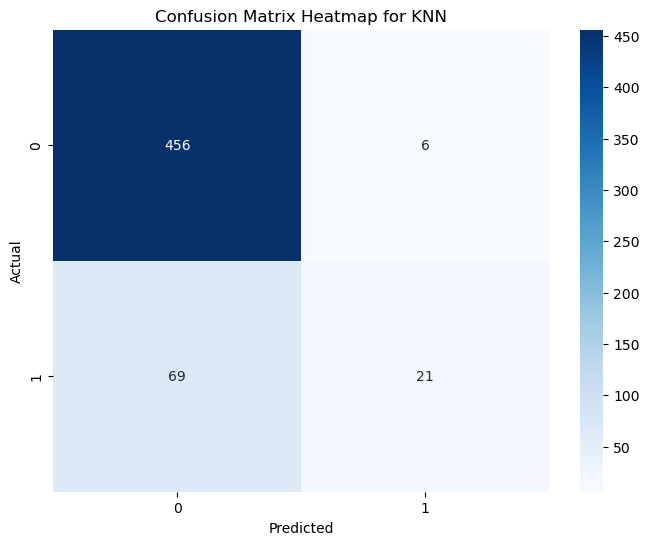

KNN Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       462
           1       0.78      0.23      0.36        90

    accuracy                           0.86       552
   macro avg       0.82      0.61      0.64       552
weighted avg       0.85      0.86      0.83       552



In [8]:
if __name__ == "__main__":
    # Load dataset 
    df = pd.read_csv("Cleaned_Marketing_data")
    target = "Response" 
    
    marketing_response = Marketing_Response(df, target)
    marketing_response.split_data()
    marketing_response.run_experiments()